## 1. Mise en forme des données

#### Réseau de convolution
Un réseau de convolution doit être constitué de couche de convolution avec des couches de pooling, une couche flatten, des couches denses avec une activation Relu, on peut y ajouter des dropout et enfin un softmax pour finir.

Pour les entrées, il faut normaliser les images en les divisant par 255 pour avoir des valeurs compris entre 0 et 1. \
Pour l'utilisation de **sparse_categorical_crossentropy** il ne faut pas que les labels soient des vecteurs one-hot mais plutot des entiers.

*Pourquoi ces transformation* :\
Il n'y a donc pas besoin de transformer les labels en one-hot car la fonction **sparse_categorical_crossentropy** s'attend à recevoir des entiers. \
Et normaliser les images aide à avoir un meilleure apprentissage pour le modèle.

In [1]:
from keras.datasets import fashion_mnist
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

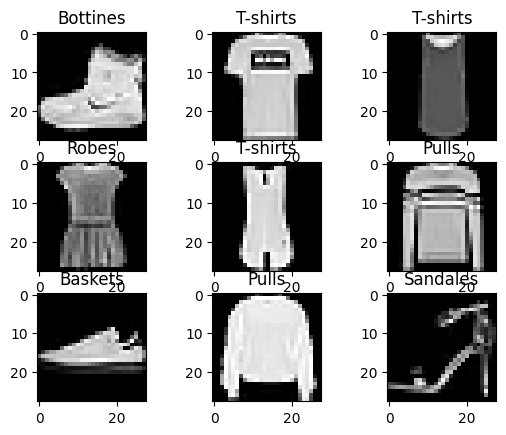

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

label_names = ['T-shirts', 'Pantalons', 'Pulls', 'Robes', 'Manteaux',
               'Sandales', 'Chemises', 'Baskets', 'Sacs', 'Bottines']

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(label_names[y_train[i]])
plt.show()

In [3]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')

X_train /= 255
X_test /= 255

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


## 2. Création d’un premier modèle 

La couche de sortie dois être un softmax car nous avons une classification multiple à faire, avec un nombre de neurones égale au nombre de classe (10 pour nous, de 0 à 9)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,298 (954.29 KB)

 Trainable params: 244,298 (954.29 KB)

 Non-trainable params: 0 (0.00 B)

Il y a un total de 244,298 paramètres à caler. Pour la première convolution : 5 * 5 * 16 + 16 = 416. On peut constater le nombre de paramètre détailler sur le "summary".

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size = 512
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5852 - loss: 1.2400 - val_accuracy: 0.7923 - val_loss: 0.5396
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8085 - loss: 0.5076 - val_accuracy: 0.8263 - val_loss: 0.4839
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8442 - loss: 0.4327 - val_accuracy: 0.8586 - val_loss: 0.3900
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8629 - loss: 0.3823 - val_accuracy: 0.8698 - val_loss: 0.3694
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.8758 - loss: 0.3438 - val_accuracy: 0.8770 - val_loss: 0.3503
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8840 - loss: 0.3221 - val_accuracy: 0.8827 - val_loss: 0.3298
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8863 - loss: 0.3137 - val_accuracy: 0.8811 - val_loss: 0.3305
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8937 - loss: 0.2965 - val_accuracy: 0.8796 - v

<Axes: >

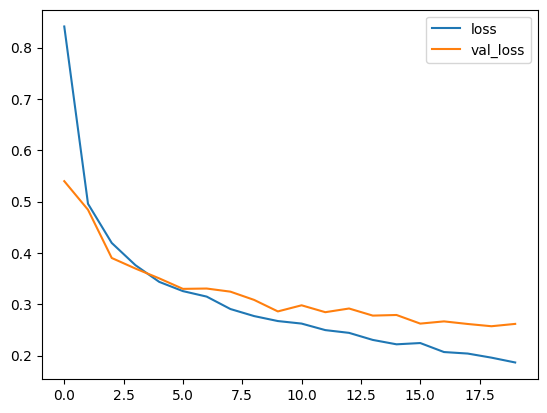

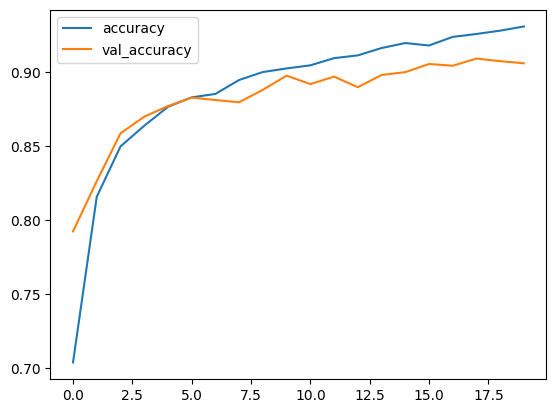

In [6]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

Le modèle n'est pas trop mal, nous avons une accuracy d'environ 90 ce qui est plutot bien, mais nous pouvons constater que les courbes ne sont pas très lisse.

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3941 - loss: 1.6444 - val_accuracy: 0.7598 - val_loss: 0.6362
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7341 - loss: 0.7098 - val_accuracy: 0.8005 - val_loss: 0.5302
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7699 - loss: 0.6138 - val_accuracy: 0.8238 - val_loss: 0.4762
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7941 - loss: 0.5565 - val_accuracy: 0.8375 - val_loss: 0.4439
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8080 - loss: 0.5196 - val_accuracy: 0.8480 - val_loss: 0.4168
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8169 - loss: 0.4917 - val_accuracy: 0.8553 - val_loss: 0.3927
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8255 - loss: 0.4713 - val_accuracy: 0.8634 - val_loss: 0.3731
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8367 - loss: 0.4480 - val_accuracy: 0.8716 - v

<Axes: >

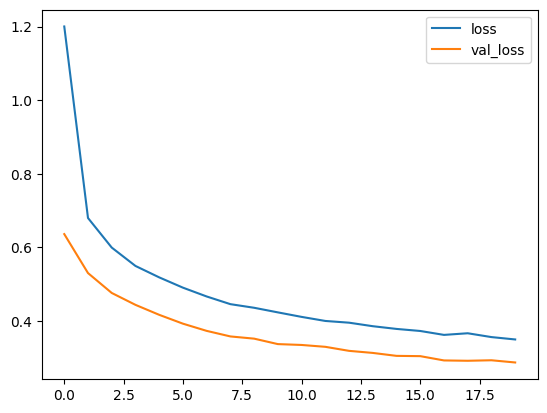

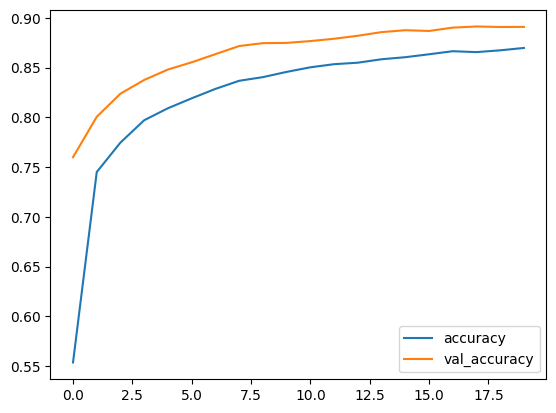

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

Les courbes sont plus lisse et le modele est plus performant.

Il n'est pas juditieux dans notre cas de faire plus de 20 epochs, le modèle commencerais à faire du sur apprentissage.

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3259 - loss: 1.8058 - val_accuracy: 0.7582 - val_loss: 0.6330
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7231 - loss: 0.7443 - val_accuracy: 0.7924 - val_loss: 0.5244
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.7672 - loss: 0.6192 - val_accuracy: 0.8102 - val_loss: 0.4946
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7834 - loss: 0.5680 - val_accuracy: 0.8228 - val_loss: 0.4489
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7989 - loss: 0.5278 - val_accuracy: 0.8422 - val_loss: 0.4211
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8117 - loss: 0.5069 - val_accuracy: 0.8504 - val_loss: 0.4032
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8273 - loss: 0.4745 - val_accuracy: 0.8609 - val_loss: 0.3856
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8325 - loss: 0.4607 - val_accuracy: 0.8682 - v

<Axes: >

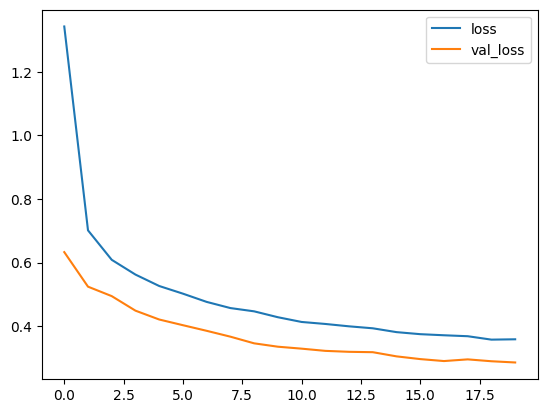

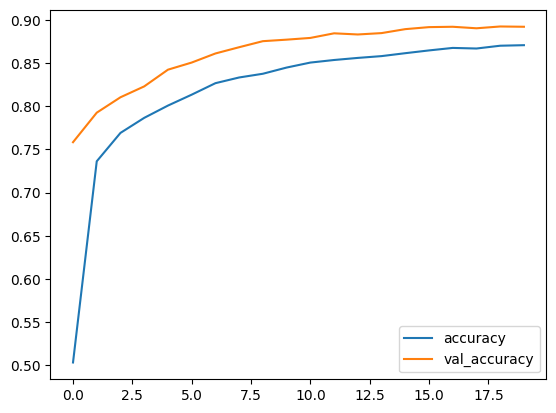

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

En ajoutant une couche de 128 notre modèle, il n'est pas vraiment améliorer. Je pense qu'il faudrait enlever la dernière couche car les résultats obtenus sont équivalent et je ne pense pas que le modèle puisse être plus améliorer que ce qu'on à maitenant.

## 3. Traitement des données cifar

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
y_train.shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

Les données sont de type numpy.ndarray. La forme des données d'entrée pour le train est (50000, 32, 32, 3) et pour le test est (10000, 32, 32, 3). Les targets pour le train ont la forme (50000, 1) et pour le test ont la forme (10000, 1). Ce qui indique que la taille des images est de 32 x 32 pixels et sont en couleurs.

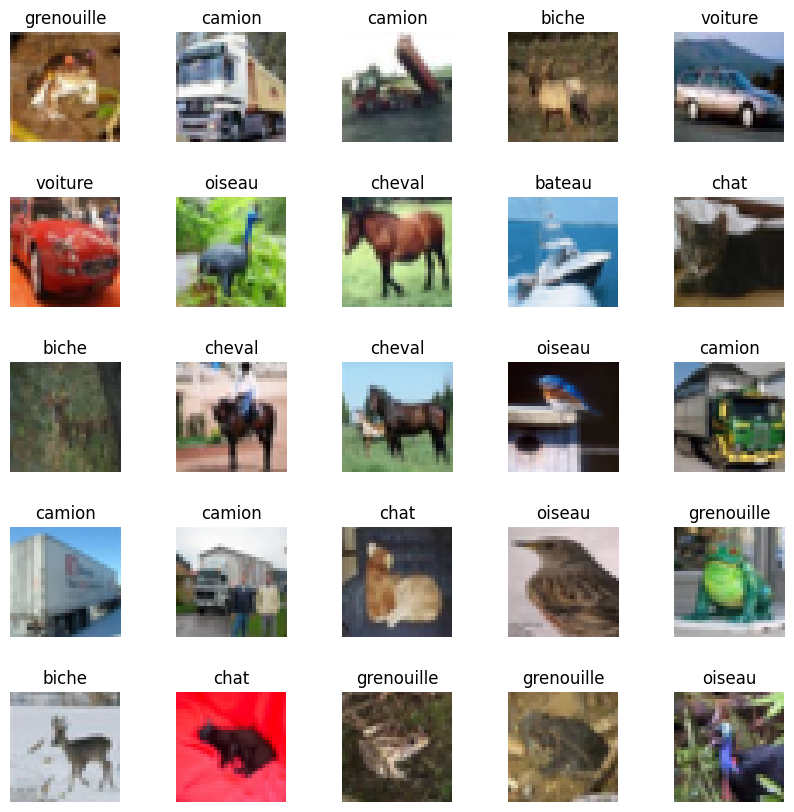

In [4]:
target_names = ['avion', 'voiture', 'oiseau', 'chat', 'biche', 'chien', 'grenouille', 'cheval', 'bateau', 'camion']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, 1 + i)
    plt.imshow(X_train[i])
    plt.title(target_names[y_train[i][0]])
    plt.axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [5]:
model_cifar = tf.keras.models.Sequential()
model_cifar.add(tf.keras.layers.Input(shape=(32, 32, 3)))
model_cifar.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Flatten())
model_cifar.add(tf.keras.layers.Dense(256, activation='relu'))
model_cifar.add(tf.keras.layers.Dense(128, activation='relu'))
model_cifar.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cifar.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,210 (1.28 MB)

 Trainable params: 335,210 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.1552 - loss: 21.1545 - val_accuracy: 0.2917 - val_loss: 1.9278
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.3282 - loss: 1.8516 - val_accuracy: 0.3653 - val_loss: 1.7595
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.4187 - loss: 1.6286 - val_accuracy: 0.4126 - val_loss: 1.6516
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.4764 - loss: 1.4641 - val_accuracy: 0.4439 - val_loss: 1.5798
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.5294 - loss: 1.3268 - val_accuracy: 0.4585 - val_loss: 1.5356
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.5721 - loss: 1.2191 - val_accuracy: 0.4712 - val_loss: 1.5807
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.6159 - loss: 1.1065 - val_accuracy: 0.4777 - val_loss: 1.5477
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.6444 - loss: 1.0173 - val_accuracy: 0.4647 - 

<Axes: >

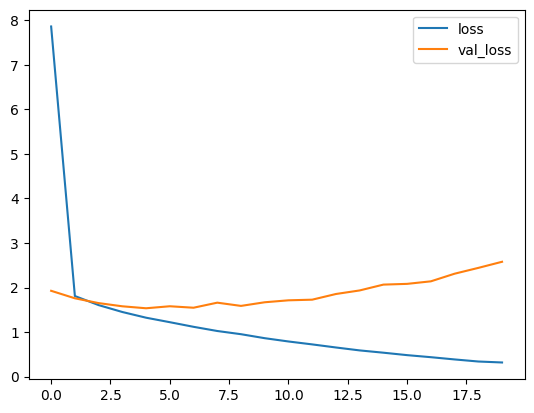

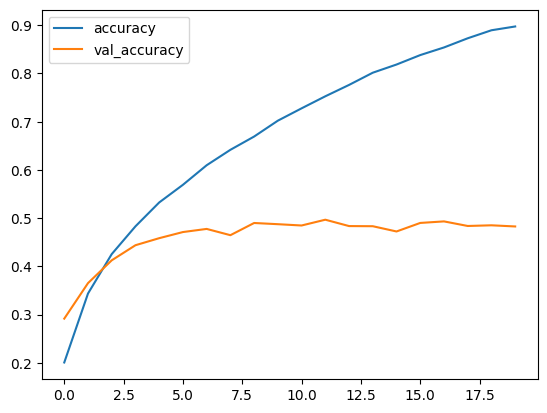

In [7]:
model_cifar.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_cifar.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

On voit bien que le modèle n'est pas très bon, on arrive à une accuracy de 51.

In [8]:
X_train = X_train.reshape(-1, 32, 32, 3).astype('float32')
X_test = X_test.reshape(-1, 32, 32, 3).astype('float32')

X_train /= 255
X_test /= 255

Je pense qu'en normalisant les images le modèle devrait être amélioré.

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.1824 - loss: 2.1732 - val_accuracy: 0.4096 - val_loss: 1.6384
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.3708 - loss: 1.7005 - val_accuracy: 0.4718 - val_loss: 1.4727
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.4323 - loss: 1.5512 - val_accuracy: 0.5105 - val_loss: 1.3686
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.4797 - loss: 1.4427 - val_accuracy: 0.5279 - val_loss: 1.3297
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.5110 - loss: 1.3739 - val_accuracy: 0.5470 - val_loss: 1.2825
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.5200 - loss: 1.3342 - val_accuracy: 0.5544 - val_loss: 1.2510
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.5401 - loss: 1.2913 - val_accuracy: 0.5803 - val_loss: 1.2000
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.5598 - loss: 1.2475 - val_accuracy: 0.5883 - v

<Axes: >

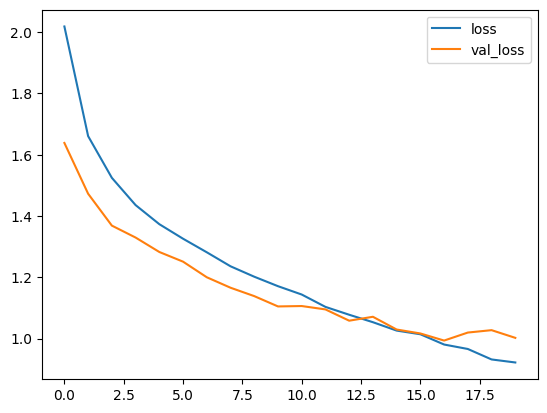

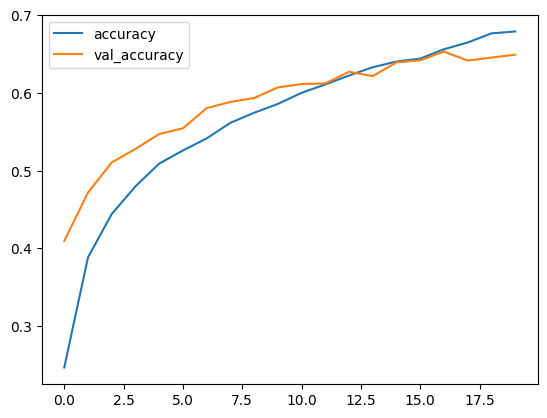

In [10]:
model_cifar = tf.keras.models.Sequential()
model_cifar.add(tf.keras.layers.Input(shape=(32, 32, 3)))
model_cifar.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Flatten())
model_cifar.add(tf.keras.layers.Dense(256, activation='relu'))
model_cifar.add(tf.keras.layers.Dropout(0.5))
model_cifar.add(tf.keras.layers.Dense(128, activation='relu'))
model_cifar.add(tf.keras.layers.Dropout(0.5))
model_cifar.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cifar.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_cifar.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

Le model n'est toujours pas très bon même si on peut voir que le modèle généralise assez bien, on peut voir des pics sur les courbes mais il n'a toujours pas une bonne accuracy.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


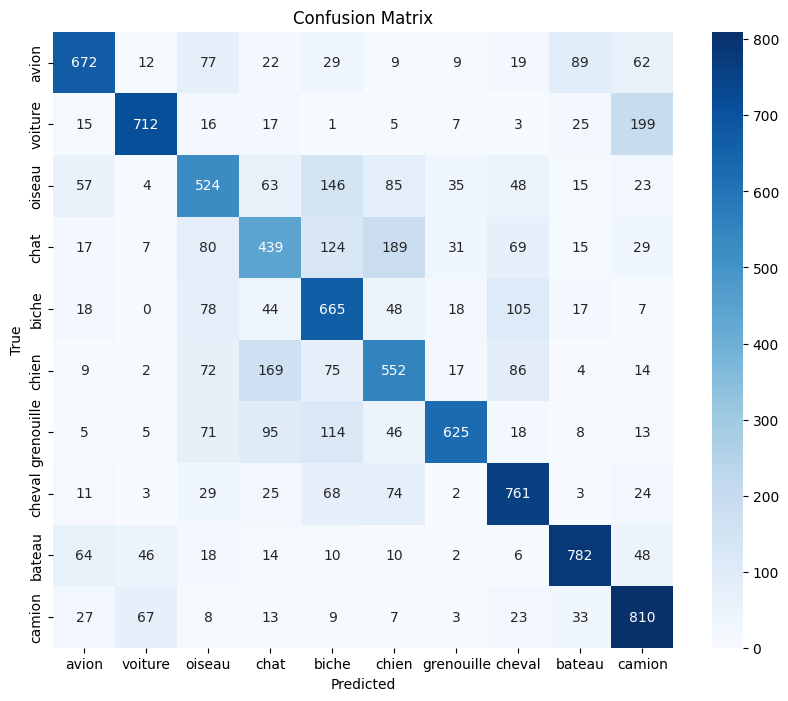

              precision    recall  f1-score   support

       avion       0.75      0.67      0.71      1000
     voiture       0.83      0.71      0.77      1000
      oiseau       0.54      0.52      0.53      1000
        chat       0.49      0.44      0.46      1000
       biche       0.54      0.67      0.59      1000
       chien       0.54      0.55      0.55      1000
  grenouille       0.83      0.62      0.71      1000
      cheval       0.67      0.76      0.71      1000
      bateau       0.79      0.78      0.79      1000
      camion       0.66      0.81      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



In [ ]:
y_pred = model_cifar.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten() 

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=target_names))

La classe la moins bien évalué est la classe des chats.

## 4. Amélioration du modèle

En ajoutant deux nouvelles couches de convolution avec des couches de pooling le modèle risque d'être en sur apprentissage. Mais surtout avec les nouvelles couches de pooling l'image risque d'être trop réduite.

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.1709 - loss: 2.1689 - val_accuracy: 0.3502 - val_loss: 1.7507
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.3346 - loss: 1.7763 - val_accuracy: 0.4243 - val_loss: 1.5828
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.4113 - loss: 1.6070 - val_accuracy: 0.4658 - val_loss: 1.4551
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.4450 - loss: 1.5183 - val_accuracy: 0.4938 - val_loss: 1.3787
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.4799 - loss: 1.4361 - val_accuracy: 0.5176 - val_loss: 1.3547
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.4996 - loss: 1.3859 - val_accuracy: 0.5262 - val_loss: 1.3307
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.5175 - loss: 1.3563 - val_accuracy: 0.5636 - val_loss: 1.2265
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.5440 - loss: 1.2764 - val_accuracy:

<Axes: >

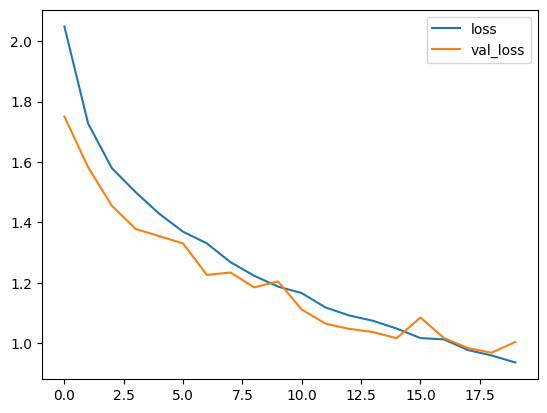

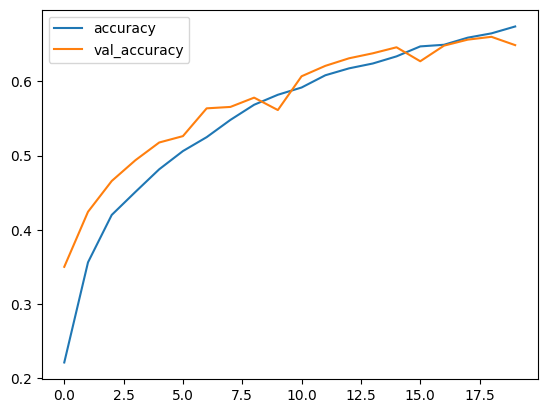

In [ ]:
model_cifar = tf.keras.models.Sequential()
model_cifar.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model_cifar.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'))
model_cifar.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'))

model_cifar.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu')) 
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Flatten())
model_cifar.add(tf.keras.layers.Dense(256, activation='relu'))
model_cifar.add(tf.keras.layers.Dropout(0.5))
model_cifar.add(tf.keras.layers.Dense(128, activation='relu'))
model_cifar.add(tf.keras.layers.Dropout(0.5))
model_cifar.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cifar.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_cifar.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

In [13]:
model_cifar.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 746,912 (2.85 MB)

 Trainable params: 248,970 (972.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 497,942 (1.90 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


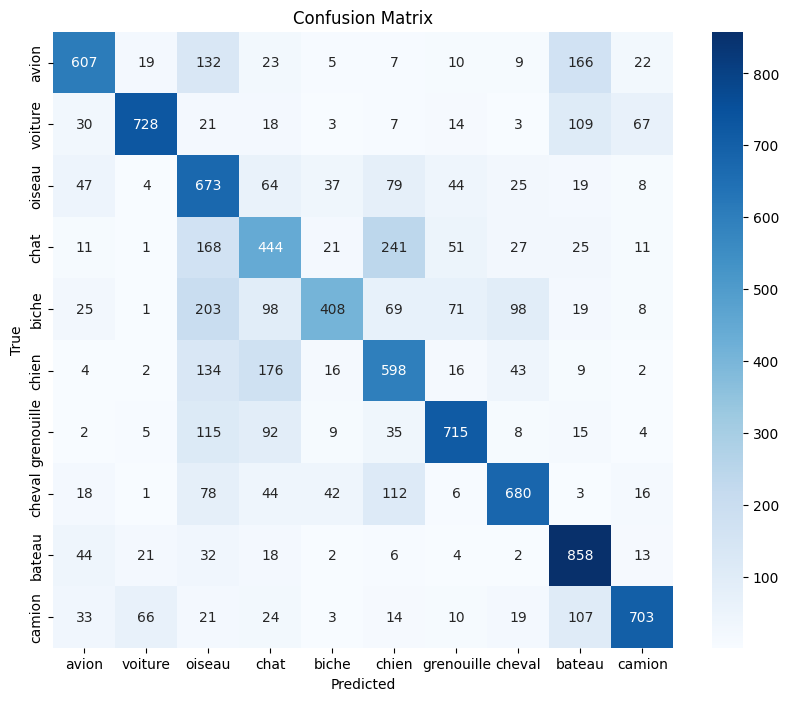

              precision    recall  f1-score   support

       avion       0.74      0.61      0.67      1000
     voiture       0.86      0.73      0.79      1000
      oiseau       0.43      0.67      0.52      1000
        chat       0.44      0.44      0.44      1000
       biche       0.75      0.41      0.53      1000
       chien       0.51      0.60      0.55      1000
  grenouille       0.76      0.71      0.74      1000
      cheval       0.74      0.68      0.71      1000
      bateau       0.65      0.86      0.74      1000
      camion       0.82      0.70      0.76      1000

    accuracy                           0.64     10000
   macro avg       0.67      0.64      0.64     10000
weighted avg       0.67      0.64      0.64     10000



In [14]:
y_pred = model_cifar.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten() 

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=target_names))

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 169ms/step - accuracy: 0.1920 - loss: 2.1528 - val_accuracy: 0.4023 - val_loss: 1.6750
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 174ms/step - accuracy: 0.3669 - loss: 1.7130 - val_accuracy: 0.4468 - val_loss: 1.5321
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 175ms/step - accuracy: 0.4347 - loss: 1.5430 - val_accuracy: 0.5009 - val_loss: 1.3978
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 173ms/step - accuracy: 0.4920 - loss: 1.4022 - val_accuracy: 0.5260 - val_loss: 1.3575
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 177ms/step - accuracy: 0.5212 - loss: 1.3442 - val_accuracy: 0.5931 - val_loss: 1.1542
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - accuracy: 0.5614 - loss: 1.2258 - val_accuracy: 0.6129 - val_loss: 1.1085
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - accuracy: 0.5878 - loss: 1.1768 - val_accuracy: 0.6252 - val_loss: 1.0634
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - accuracy: 0.6068 - loss: 1.1136 - val_accu

<Axes: >

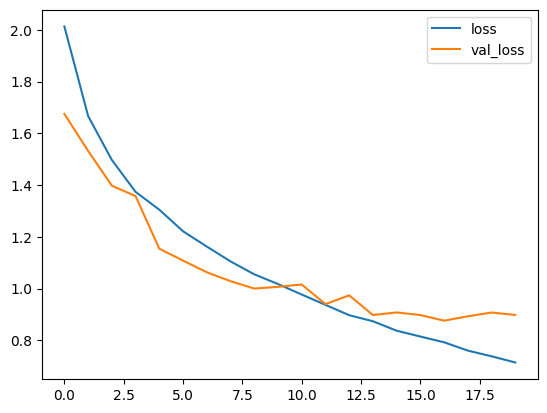

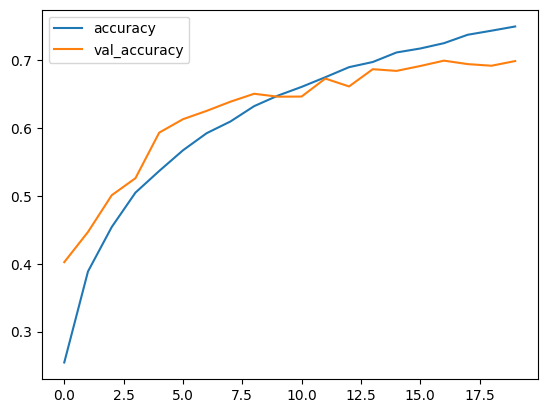

In [ ]:
model_cifar = tf.keras.models.Sequential()
model_cifar.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model_cifar.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))

model_cifar.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Flatten())
model_cifar.add(tf.keras.layers.Dense(256, activation='relu'))
model_cifar.add(tf.keras.layers.Dropout(0.5))
model_cifar.add(tf.keras.layers.Dense(128, activation='relu'))
model_cifar.add(tf.keras.layers.Dropout(0.5))
model_cifar.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cifar.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_cifar.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

En ajoutant le padding les valeurs d'apprentissage et de validation sont très proches mais les courbes ne sont pas très lisse.

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - accuracy: 0.1617 - loss: 2.2066 - val_accuracy: 0.3476 - val_loss: 1.8261
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 177ms/step - accuracy: 0.3251 - loss: 1.8373 - val_accuracy: 0.4279 - val_loss: 1.5994
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - accuracy: 0.3921 - loss: 1.6656 - val_accuracy: 0.4721 - val_loss: 1.4843
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 188ms/step - accuracy: 0.4384 - loss: 1.5376 - val_accuracy: 0.5022 - val_loss: 1.3899
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - accuracy: 0.4692 - loss: 1.4744 - val_accuracy: 0.5413 - val_loss: 1.2921
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 192ms/step - accuracy: 0.5028 - loss: 1.3965 - val_accuracy: 0.5570 - val_loss: 1.2482
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 192ms/step - accuracy: 0.5218 - loss: 1.3380 - val_accuracy: 0.5819 - val_loss: 1.1752
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 191ms/step - accuracy: 0.5308 - loss: 1.3143 - val_accu

<Axes: >

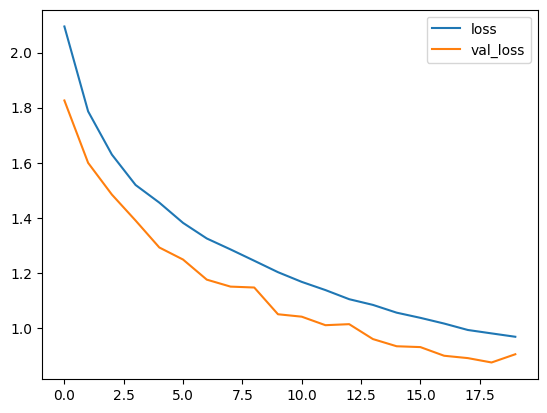

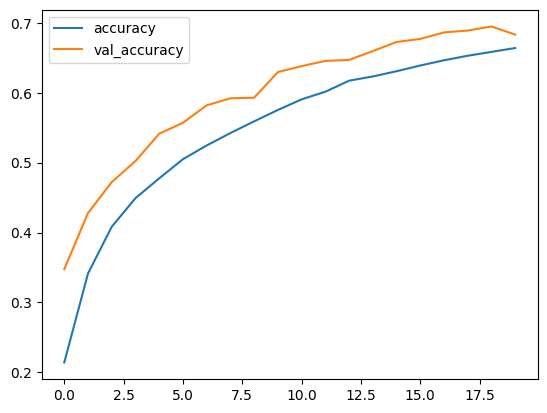

In [16]:
model_cifar = tf.keras.models.Sequential()
model_cifar.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model_cifar.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Dropout(0.25))
model_cifar.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Dropout(0.25))
model_cifar.add(tf.keras.layers.Flatten())
model_cifar.add(tf.keras.layers.Dense(256, activation='relu'))
model_cifar.add(tf.keras.layers.Dropout(0.5))
model_cifar.add(tf.keras.layers.Dense(128, activation='relu'))
model_cifar.add(tf.keras.layers.Dropout(0.5))
model_cifar.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cifar.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_cifar.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

l'apprentissage n'est pas améliorer sur la partie train

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


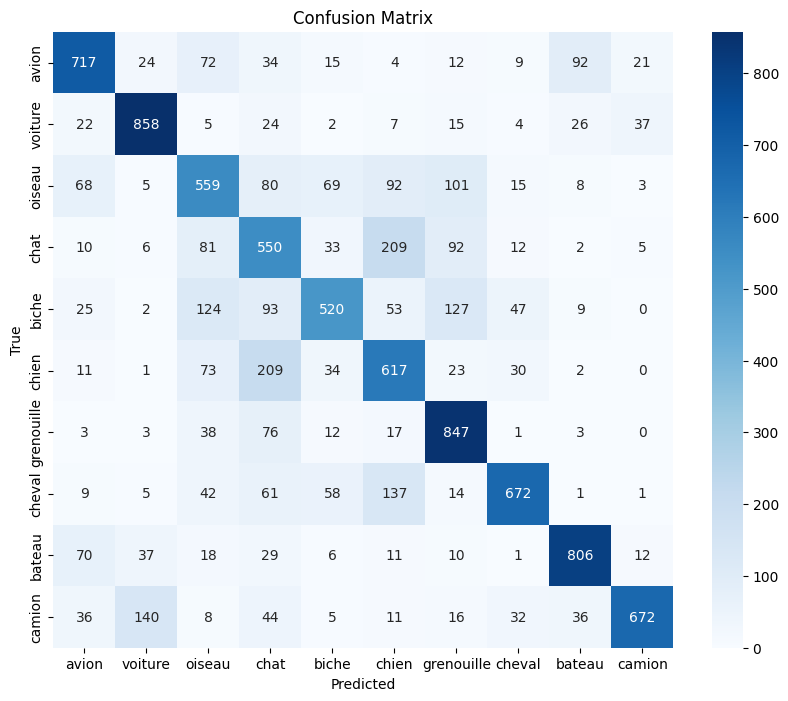

              precision    recall  f1-score   support

       avion       0.74      0.72      0.73      1000
     voiture       0.79      0.86      0.82      1000
      oiseau       0.55      0.56      0.55      1000
        chat       0.46      0.55      0.50      1000
       biche       0.69      0.52      0.59      1000
       chien       0.53      0.62      0.57      1000
  grenouille       0.67      0.85      0.75      1000
      cheval       0.82      0.67      0.74      1000
      bateau       0.82      0.81      0.81      1000
      camion       0.89      0.67      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000

Les trois catégories d'erreurs les plus fréquentes sont :
Vraie classe: camion, Prédite: voiture, Nombre d'erreurs: 140
Vraie classe: chat, Prédite: chien, Nombre d'erreurs: 209
Vraie classe: chien, Prédite: chat, Nombre d'erreurs: 209


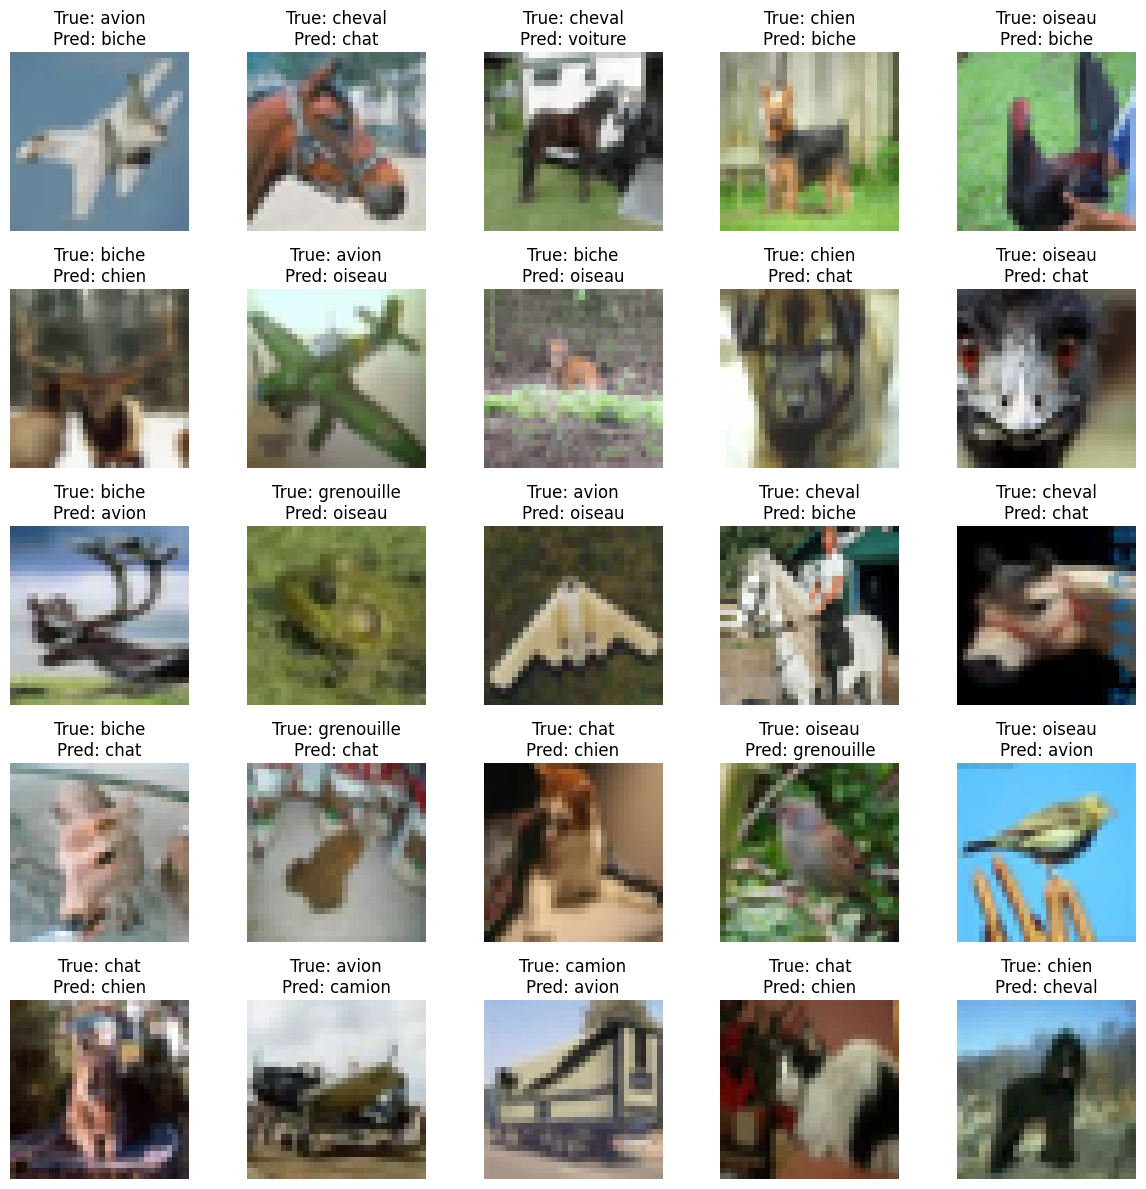

In [19]:
y_pred = model_cifar.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten() 

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=target_names))

errors = np.where(y_pred_classes != y_true)[0]
error_counts = np.zeros((10, 10), dtype=int)

for i in errors:
    error_counts[y_true[i], y_pred_classes[i]] += 1

error_counts_flat = error_counts.flatten()
top_3_errors_indices = np.argsort(error_counts_flat)[-3:]
top_3_errors = [(index // 10, index % 10) for index in top_3_errors_indices]

print("Les trois catégories d'erreurs les plus fréquentes sont :")
for true_class, pred_class in top_3_errors:
    print(f"Vraie classe: {target_names[true_class]}, Prédite: {target_names[pred_class]}, Nombre d'erreurs: {error_counts[true_class, pred_class]}")

plt.figure(figsize=(12, 12))
for i, error_index in enumerate(errors[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[error_index])
    plt.title(f"True: {target_names[y_true[error_index]]}\nPred: {target_names[y_pred_classes[error_index]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 5. Etude de quelques modifications

In [ ]:
model_cifar = tf.keras.models.Sequential()
model_cifar.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model_cifar.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Dropout(0.25))
model_cifar.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Dropout(0.25))

model_cifar.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Dropout(0.25))
model_cifar.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Dropout(0.25))

model_cifar.add(tf.keras.layers.Flatten())
model_cifar.add(tf.keras.layers.Dense(256, activation='relu'))
model_cifar.add(tf.keras.layers.Dropout(0.5))
model_cifar.add(tf.keras.layers.Dense(128, activation='relu'))
model_cifar.add(tf.keras.layers.Dropout(0.5))
model_cifar.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cifar.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_cifar.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()